In [1]:
# 기존 데이타 load
import os

dirr = "/media/syh/ssd2/data/MOT16"
dirs = "/media/syh/ssd2/data/ReID/bounding_box_train"
list_bbox=os.listdir(dirs)
list_bbox.sort()

'''
MOT16
ㄴtrain
  ㄴMOT16-13
    ㄴdet
      ㄴdet.txt
        <frame>,<id>,<bb_left>,<bb_top>,<bb_width>,<bb_height>,<conf>,<x>,<y>,<z>
    ㄴgt
      ㄴgt.txt
        frame, id, left, top, width, height, conf
        1,1,1376,485,37,28,0,11,1
        2,1,1379,486,37,28,0,11,1
        ...
    ㄴimg1
      ㄴ000001.jpg
      ㄴ000002.jpg
      ...
      ㄴ000750.jpg
      
    seqinfo.ini
        [Sequence]
        name=MOT16-13
        imDir=img1
        frameRate=25
        seqLength=750
        imWidth=1920
        imHeight=1080
        imExt=.jpg

  ㄴMOT16-11
  ㄴMOT16-10
  ㄴMOT16-09
  ㄴMOT16-05
  ㄴMOT16-04
  ㄴMOT16-02
ㄴtest
  ㄴMOT16-01
  ㄴMOT16-03
  ㄴMOT16-06
  ㄴMOT16-07
  ㄴMOT16-08
  ㄴMOT16-12
  ㄴMOT16-14
ㄴimages
ㄴlabels_with_ids
'''


'\nMOT16\nㄴtrain\n  ㄴMOT16-13\n    ㄴdet\n      ㄴdet.txt\n        <frame>,<id>,<bb_left>,<bb_top>,<bb_width>,<bb_height>,<conf>,<x>,<y>,<z>\n    ㄴgt\n      ㄴgt.txt\n        frame, id, left, top, width, height, conf\n        1,1,1376,485,37,28,0,11,1\n        2,1,1379,486,37,28,0,11,1\n        ...\n    ㄴimg1\n      ㄴ000001.jpg\n      ㄴ000002.jpg\n      ...\n      ㄴ000750.jpg\n      \n    seqinfo.ini\n        [Sequence]\n        name=MOT16-13\n        imDir=img1\n        frameRate=25\n        seqLength=750\n        imWidth=1920\n        imHeight=1080\n        imExt=.jpg\n\n  ㄴMOT16-11\n  ㄴMOT16-10\n  ㄴMOT16-09\n  ㄴMOT16-05\n  ㄴMOT16-04\n  ㄴMOT16-02\nㄴtest\n  ㄴMOT16-01\n  ㄴMOT16-03\n  ㄴMOT16-06\n  ㄴMOT16-07\n  ㄴMOT16-08\n  ㄴMOT16-12\n  ㄴMOT16-14\nㄴimages\nㄴlabels_with_ids\n'

In [210]:
list_bbox[0]

'000001_c100_20221201181334_mp4_100.jpg'

In [108]:
class bbox():
    def __init__(self,url,id_,cam,proj,ext_,frame):
        self.id=int(id_)
        self.cam=int(cam[1:])
        self.proj=proj
        self.ext_=ext_
        self.frame=int(frame)
        self.url=url
    # def __repr__(self):
    #     return '_'.join([str(self.id),str(self.cam),self.proj,self.ext_,str(self.frame)])
    def __repr__(self):
        return self.url
    def get_frame(self):
        return self.frame
    def get_id(self):
        return self.id
    def get_cam(self):
        return self.cam
    def get_proj(self):
        return self.proj
    def __lt__(self, other):
        if type(other) !=bbox:
            return self.get_frame()<other
        else:
            return self.get_frame() < other.get_frame()

    def __le__(self, other):
        return self.get_frame() <= other.get_frame()

    def __gt__(self, other):
        return self.get_frame() > other.get_frame()

    def __ge__(self, other):
        return self.get_frame() <= other.get_frame()

    def __eq__(self, other):
        return self.get_frame() == other.get_frame()

tracklet_id=0

class Tracklet():
    def __init__(self,id_,cam,proj,init_box,duration,length):
        self.length=length
        # tracklet_id +=1
        self.tracklet_id=tracklet_id
        self.id=int(id_)
        self.cam=int(cam)
        self.proj=proj
        self.dur=duration
        # self.ext_=ext_
        # self.frame=int(frame)
        # self.url=url
        self.bbox=[init_box]
    
    def __getitem__(self,idx):
        return self.bbox[idx]
    def get_tr_id(self):
        return self.tracklet_id
    def __len__(self):
        return len(self.bbox)
    def add_bbox(self,bbox):
        if bbox.get_id()!=self.id or bbox.get_cam()!=self.cam or len(self)>=120:
            return False
        else:
            if self.bbox[-1]<bbox and self.bbox[-1].get_frame()+self.dur>bbox:
                self.bbox.append(bbox)
            else:
                return False
        self.bbox.sort()
        return True
    
    def get_id(self):
        return self.id
    
    def get_bboxes(self):
        return self.bbox

bbox_list=[]
for li in list_bbox:
    bbox_list.append(bbox(li,*li.split(".")[0].split("_")))
    
bbox_list.sort() 


In [109]:
tracklet_id=0
length = 120
delay = 50 #duration == 프레임간 같은 트랙이라고 용인할 frame 차이
tracklets=[Tracklet(bbox_list[0].get_id(),bbox_list[0].get_cam(),bbox_list[0].get_proj(),bbox_list[0],delay,length)]
print("Make Initial Tracklets ...")
print("Tracklet Delay Frame : ", delay)
for bb in bbox_list:
    is_add=False
    for tracklet in tracklets:
        if tracklet.add_bbox(bb):
            is_add=True
            break
    if is_add:
        continue
    tracklets.append(Tracklet(bb.get_id(),bb.get_cam(),bb.get_proj(),bb,delay,length))
    tracklet_id+=1
print("Gen initial Tracklet : ",tracklet_id)
   

Make Initial Tracklets ...
Tracklet Delay Frame :  50
Gen initial Tracklet :  2212


In [111]:
track_120=[]
pos_track=[]
neg_track=[]

 


In [112]:
for tr in tracklets:
    if len(tr)==120:
        track_120.append(tr)

In [121]:
track_120[200]

In [122]:
len(track_120)

396

In [127]:
trkee=track_120[200].get_bboxes()

In [129]:
type(trkee[0])

__main__.bbox

In [130]:
aaa=[1,2,3,4,5]

In [131]:
aa=aaa.pop()

In [132]:
aa

5

In [142]:
a=list(range(1,121))


In [64]:
tracklets

2213

In [59]:
tracklets[0].__len__()

31

In [6]:
tracklets

False

In [65]:
counter=0
len_list=[]
for tr in tracklets:
    counter+=len(tr)
    len_list.append(len(tr))

In [70]:
sum([li==120 for li in len_list])

396

In [27]:
import numpy as np

In [71]:
np.histogram(len_list)

(array([452, 367, 272, 224, 133, 122,  86,  70,  49, 438]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]))

In [72]:
import matplotlib.pyplot as plt

(array([ 56.,  47.,  32.,  33.,  35.,  43.,  30.,  29.,  30.,  30.,  35.,
         52.,  29.,  36.,  31.,  33.,  29.,  33.,  32.,  32.,  23.,  31.,
         33.,  25.,  27.,  21.,  15.,  28.,  24.,  30.,  25.,  15.,  21.,
         24.,  18.,  24.,  25.,  16.,  18.,  30.,  16.,  17.,  17.,  14.,
         17.,  18.,  19.,  17.,  17.,  13.,   9.,  13.,   7.,  18.,   4.,
         13.,  11.,   7.,  13.,   8.,  16.,  10.,  11.,   7.,   7.,  10.,
          8.,  13.,   9.,  12.,  10.,   9.,  11.,   3.,   7.,   8.,   5.,
          9.,   7.,   7.,   5.,  11.,   6.,   7.,   3.,   6.,   5.,   3.,
         10.,   6.,   6.,   7.,   3.,   8.,   2.,  11.,   4.,   9.,   4.,
          2.,   2.,   3.,   3.,   5.,   2.,   6.,   2.,   7.,   5.,   4.,
          5.,   3.,   5.,   4.,   6.,   3.,   2.,   1.,   4., 396.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.

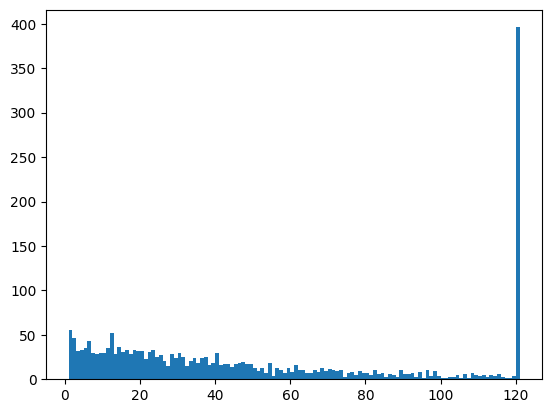

In [94]:
A,B=np.histogram(len_list,range=(1,121),bins=120)
plt.hist(len_list,bins=B)

In [28]:
counter_120=0
for tr in tracklets:
    if len(tr)>=120:
        counter_120+=1

In [29]:
counter_120

103

In [19]:
len(tracklets)

168

In [4]:
tracklets

In [7]:
tracklet_id

112981

In [ ]:
tracks=[]
for li in id_1:
    

In [6]:
id_list=[int(li[:6]) for li in list_bbox]

In [7]:
import numpy as np
id_list=np.array(id_list)

In [8]:
id_set=set(id_list)

In [10]:
id_set.__len__()

22

In [11]:
id_set

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

In [184]:
str(bbox_list[0])

'000001_c103_20221201181336_mp4_1.jpg'

In [ ]:
frame_list = 

In [179]:
type(list_bbox)

list

In [ ]:
# Tracklet format 정의


In [ ]:

# error tracklet 생성


In [ ]:

# 정상 tracklet 생성


In [ ]:

# file write

In [185]:
import torch

/home/syh/anaconda3/envs/deep_traj/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [186]:

aa=torch.Tensor([1,2,3,4,5])

In [187]:
bb=torch.unique(aa)

In [189]:
int(len(bb)==5
   )


1

In [191]:
list(range(0,119))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118]

In [202]:
a=list(range(1,121))

In [203]:
for i in range(len(a)):
    if i>60:
        a[i]=123
    else:
        a[i]=1

In [206]:
a[60]

1

In [207]:
a[61]

123

In [208]:
[a[i] ==a[i+1]for i in range(len(a)-1)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [214]:
a=torch.Tensor([1])

In [215]:
len(a)

1

In [216]:
a

tensor([1.])